# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [3]:
import pandas as pd

df = pd.read_csv('base_de_dados.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

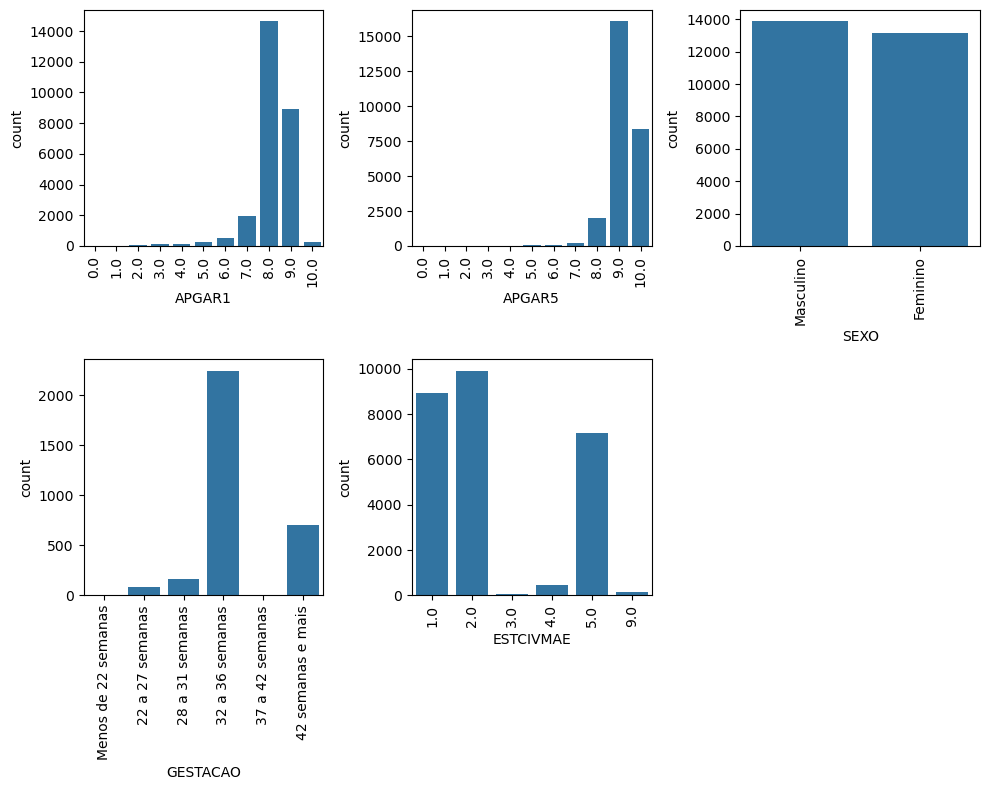

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure',figsize=(10,8))
fig,axes = plt.subplots(2,3)

ordem_gestacao = ['Menos de 22 semanas','22 a 27 semanas','28 a 31 semanas','32 a 36 semanas','37 a 42 semanas','42 semanas e mais']

sns.countplot(ax = axes[0,0], x = 'APGAR1', data=df)
sns.countplot(ax = axes[0,1], x = 'APGAR5', data=df)
sns.countplot(ax = axes[0,2], x = 'SEXO', data=df)
sns.countplot(ax = axes[1,0], x = 'GESTACAO', data=df, order = ordem_gestacao)
sns.countplot(ax = axes[1,1], x = 'ESTCIVMAE', data=df)

for ax in axes.flat:
    ax.tick_params(axis = 'x', rotation = 90)

fig.delaxes(axes[1,2])

plt.tight_layout()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<Axes: xlabel='CONSULTAS', ylabel='APGAR5'>

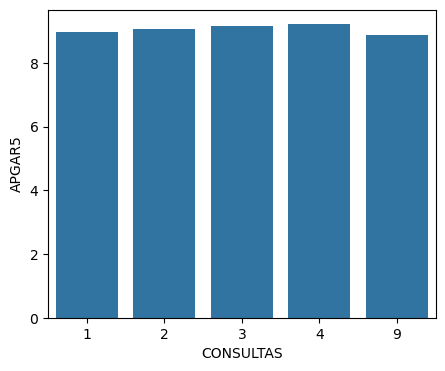

In [55]:
media_apgar5_consultas = df.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

plt.figure(figsize=(5,4))
sns.barplot(x='CONSULTAS',y='APGAR5',data=media_apgar5_consultas)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

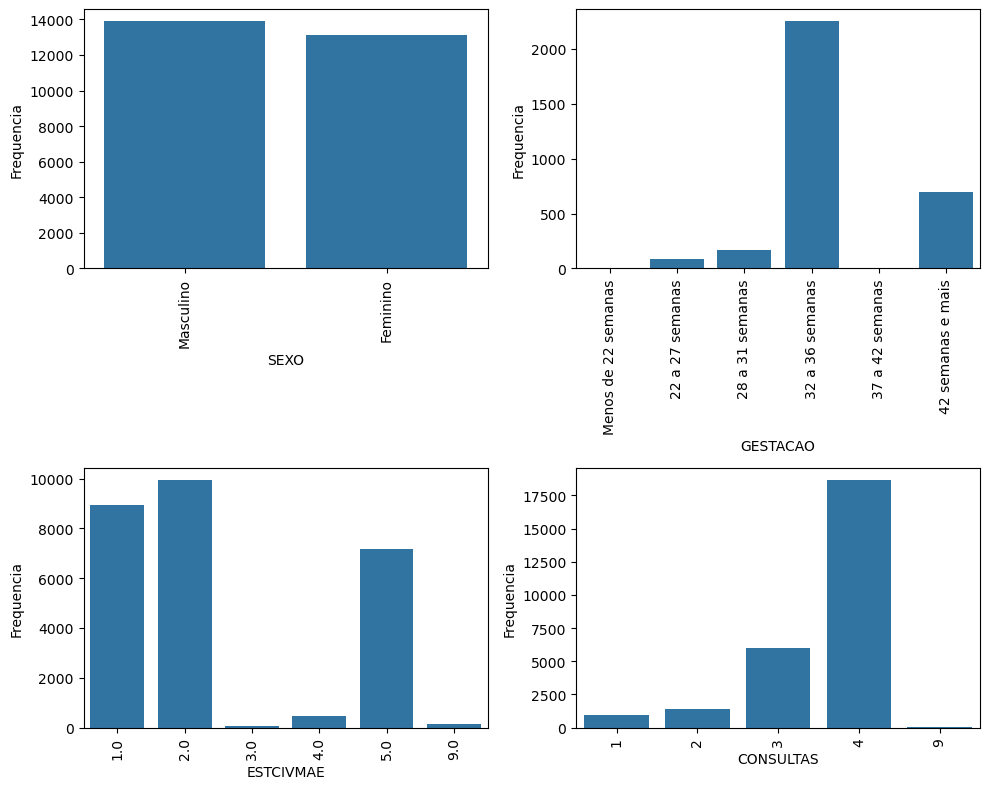

In [63]:
plt.rc('figure',figsize=(10,8))
fig,axes = plt.subplots(2,2)

ordem_gestacao = ['Menos de 22 semanas','22 a 27 semanas','28 a 31 semanas','32 a 36 semanas','37 a 42 semanas','42 semanas e mais']

sns.countplot(ax = axes[0,0], x = 'SEXO', data=df)
sns.countplot(ax = axes[0,1], x = 'GESTACAO', data=df, order=ordem_gestacao)
sns.countplot(ax = axes[1,0], x = 'ESTCIVMAE', data=df)
sns.countplot(ax = axes[1,1], x = 'CONSULTAS', data=df)

for ax in axes.flat:
    ax.tick_params(axis = 'x', rotation = 90)
    ax.set_ylabel('Frequencia')

plt.tight_layout()